## Testing the implementations of the MCMC algorithms

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from implementations import mcmc_l1, mcmc_sas

In [2]:
RANDOM_SEED = 2022
rng = np.random.default_rng(RANDOM_SEED)

#### Loading the data

In [3]:
f = open("data/spambase.columns", "r")
headers = [line.split(":")[0] for line in f]+["class"]

df = pd.read_csv("data/spambase.data", header=None) 
df.columns = headers
df.insert(0, "intercept", 1)
df["class"] = df["class"].replace(0,-1)

df

,intercept,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,-1
4597,1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,-1
4598,1,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,-1
4599,1,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,-1


In [4]:
# Compute X by multiplying each row by the class
X = np.array(df.drop('class', axis=1)) * np.array(df["class"]).reshape(-1,1)

In [5]:
# Number of samples and of dimensions
n, k = X.shape
n, k

(4601, 58)

In [6]:
# Compute variance matrix
sigma = df.drop('class', axis=1).std(axis=0)
sigma[0] = 1
sigma2 = np.diag(sigma**2)
sigma2_inv = np.diag(1/sigma**2)
sigma2_inv.shape

(58, 58)

#### Testing the MCMC $\alpha=1$ implementation

In [7]:
T = 100
nu = 1

betas1 = mcmc_l1.sample(X,sigma,rng,nu,T)

/home/mark/m2ds/bml/bml-project/implementations/mcmc_l1.py:61: RuntimeWarning: covariance is not positive-semidefinite.
  betas[t][omegas_idx] = rng.multivariate_normal(b, cov=B)


In [8]:
T = 100
nu = 1e-3

betas2 = mcmc_l1.sample(X,sigma,rng,nu,T)

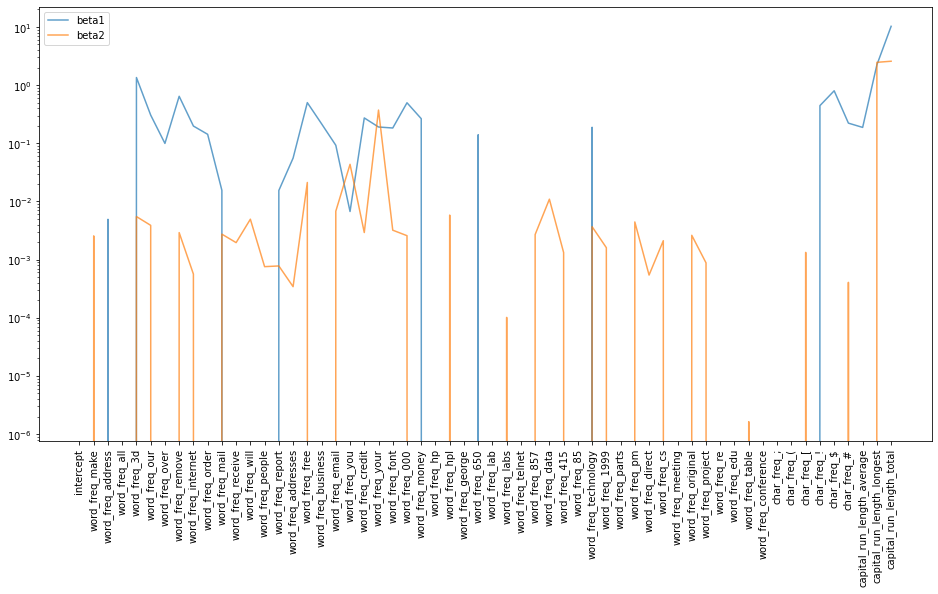

In [9]:
plt.figure(figsize=(16, 8))
coeff = np.random.randint(k)
std_betas1 = betas1.mean(axis=0)*sigma
std_betas2 = betas2.mean(axis=0)*sigma
plt.plot(std_betas1,label='beta1', alpha=.7)
plt.plot(std_betas2,label='beta2', alpha=.7)
plt.yscale("log")
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Testing the MCMC spike-and-slab implementation

In [ ]:
pi = 1/2 * np.ones(k)
nu = 100
T = 100

betas3 = mcmc_sas.sample(n,k,rng,nu,pi,T)

In [ ]:
pi = 0.01 * np.ones(k)
nu = 100
T = 100

betas4 = mcmc_sas.sample(n,k,rng,nu,pi,T)

In [ ]:
plt.figure(figsize=(16, 8))
coeff = np.random.randint(k)
std_betas1 = betas1.mean(axis=0)*sigma
std_betas2 = betas2.mean(axis=0)*sigma
plt.plot(std_betas1,label='beta3', alpha=.7)
plt.plot(std_betas2,label='beta4', alpha=.7)
plt.yscale("log")
plt.xticks(rotation=90)
plt.legend()
plt.show()